In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\FM\\Desktop\\Python_Course\\Project'

In [3]:
df_all_perth = pd.read_csv('../project/all_perth.csv', parse_dates=['date_sold'])

In [4]:
df_all_perth.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold
0,85 Fenchurch Street,Alexander Heights,445000,4.0,2.0,2.0,578,164.0,1998.0,14400.0,Greenwood Station,8300.0,2020-10-01
1,25 Goldsworthy Entrance,Alexander Heights,458000,4.0,2.0,2.0,567,145.0,2000.0,14400.0,Greenwood Station,7200.0,2020-10-01
2,4 Iris Lane,Alexander Heights,490000,4.0,2.0,2.0,502,156.0,1999.0,14600.0,Greenwood Station,7800.0,2020-12-01
3,27 Avila Way,Alexander Heights,360000,3.0,1.0,2.0,685,87.0,1988.0,13400.0,Warwick Station,6900.0,2020-12-01
4,34 Lancer Way,Alexander Heights,455000,4.0,2.0,3.0,513,128.0,1993.0,13400.0,Warwick Station,6100.0,2020-12-01


In [5]:
df_all_perth['date_sold'].dt.month.tail() #just check if the sold_date is datetime object now.

34415    5
34416    5
34417    5
34418    6
34419    6
Name: date_sold, dtype: int64

In [6]:
import numpy as np

In [7]:
df_all_perth.info() #overview of the data info, and the missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34420 entries, 0 to 34419
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   address           34420 non-null  object        
 1   suburb            34420 non-null  object        
 2   price             34420 non-null  int64         
 3   bedrooms          34420 non-null  float64       
 4   bathrooms         34420 non-null  float64       
 5   garage            31867 non-null  float64       
 6   land_area         34420 non-null  int64         
 7   floor_area        34420 non-null  float64       
 8   build_year        31051 non-null  float64       
 9   CBD_dist          34420 non-null  float64       
 10  nearest_stn       34420 non-null  object        
 11  nearest_stn_dist  34420 non-null  float64       
 12  date_sold         34420 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 3.4+ MB


In [8]:
df_all_perth.shape 

(34420, 13)

In [9]:
df_all_perth.columns #checking the columns are

Index(['address', 'suburb', 'price', 'bedrooms', 'bathrooms', 'garage',
       'land_area', 'floor_area', 'build_year', 'CBD_dist', 'nearest_stn',
       'nearest_stn_dist', 'date_sold'],
      dtype='object')

In [10]:
df_all_perth['suburb'].unique() #listing all the suburbs in this dataset

array(['Alexander Heights', 'Alfred Cove', 'Alkimos', 'Anketell',
       'Applecross', 'Ardross', 'Armadale', 'Ascot', 'Ashby', 'Ashfield',
       'Attadale', 'Atwell', 'Aubin Grove', 'Aveley', 'Balcatta',
       'Baldivis', 'Balga', 'Ballajura', 'Banjup', 'Banksia Grove',
       'Baskerville', 'Bassendean', 'Bateman', 'Bayswater',
       'Beaconsfield', 'Beckenham', 'Bedford', 'Bedfordale', 'Beechboro',
       'Beeliar', 'Beldon', 'Belhus', 'Bellevue', 'Belmont', 'Bentley',
       'Bennett Springs', 'Bertram', 'Bibra Lake', 'Bickley', 'Bicton',
       'Booragoon', 'Boya', 'Brabham', 'Brentwood', 'Brigadoon',
       'Brookdale', 'Bull Creek', 'Bullsbrook', 'Burns Beach', 'Burswood',
       'Butler', 'Byford', 'Calista', 'Camillo', 'Canning Vale',
       'Cannington', 'Carabooda', 'Cardup', 'Carine', 'Carlisle',
       'Carmel', 'Carramar', 'Casuarina', 'Caversham', 'Champion Lakes',
       'Chidlow', 'Churchlands', 'City Beach', 'Claremont', 'Clarkson',
       'Cloverdale', 'Cockburn C

In [11]:
len(df_all_perth['suburb'].unique()) #check how many suburbs in this dataset

322

In [12]:
df_all_perth.isna().sum() #checking where are missing values are and why.

address                0
suburb                 0
price                  0
bedrooms               0
bathrooms              0
garage              2553
land_area              0
floor_area             0
build_year          3369
CBD_dist               0
nearest_stn            0
nearest_stn_dist       0
date_sold              0
dtype: int64

In [13]:
missing_values = (df_all_perth.isna().sum() / df_all_perth.shape[0]) * 100
missing_values #checking the percentage of the missing data, should they be deleted?

address             0.000000
suburb              0.000000
price               0.000000
bedrooms            0.000000
bathrooms           0.000000
garage              7.417199
land_area           0.000000
floor_area          0.000000
build_year          9.787914
CBD_dist            0.000000
nearest_stn         0.000000
nearest_stn_dist    0.000000
date_sold           0.000000
dtype: float64

In [14]:
df_all_perth['garage'].describe() #checking the stats for Garage info, minimum number for garage is 1, therefore the missing value should be filled with 0, properties with no garage.

count    31867.000000
mean         2.202843
std          1.890650
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        255.000000
Name: garage, dtype: float64

In [15]:
df_all_perth_clean = df_all_perth.copy() #make a copy of the data

In [16]:
df_all_perth_clean['garage'] = df_all_perth_clean['garage'].fillna(0) #filling the missing value with 0 in garage column

In [17]:
df_all_perth_clean.isna().sum()

address                0
suburb                 0
price                  0
bedrooms               0
bathrooms              0
garage                 0
land_area              0
floor_area             0
build_year          3369
CBD_dist               0
nearest_stn            0
nearest_stn_dist       0
date_sold              0
dtype: int64

In [18]:
df_all_perth_clean.duplicated().sum()

0

In [19]:
missing_values_clean = (df_all_perth_clean.isna().sum() / df_all_perth_clean.shape[0]) * 100
missing_values_clean

address             0.000000
suburb              0.000000
price               0.000000
bedrooms            0.000000
bathrooms           0.000000
garage              0.000000
land_area           0.000000
floor_area          0.000000
build_year          9.787914
CBD_dist            0.000000
nearest_stn         0.000000
nearest_stn_dist    0.000000
date_sold           0.000000
dtype: float64

In [20]:
# I decide not to drop all the missing rows where has no info for build_year, as I want to keep the data complete to truely reflect the house price.
# The build_year info is not my main concern, therefore I will fill them with 0.

In [21]:
df_all_perth_clean['build_year'] = df_all_perth_clean['build_year'].fillna(0)

In [22]:
df_all_perth_clean.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold
0,85 Fenchurch Street,Alexander Heights,445000,4.0,2.0,2.0,578,164.0,1998.0,14400.0,Greenwood Station,8300.0,2020-10-01
1,25 Goldsworthy Entrance,Alexander Heights,458000,4.0,2.0,2.0,567,145.0,2000.0,14400.0,Greenwood Station,7200.0,2020-10-01
2,4 Iris Lane,Alexander Heights,490000,4.0,2.0,2.0,502,156.0,1999.0,14600.0,Greenwood Station,7800.0,2020-12-01
3,27 Avila Way,Alexander Heights,360000,3.0,1.0,2.0,685,87.0,1988.0,13400.0,Warwick Station,6900.0,2020-12-01
4,34 Lancer Way,Alexander Heights,455000,4.0,2.0,3.0,513,128.0,1993.0,13400.0,Warwick Station,6100.0,2020-12-01


In [23]:
df_all_perth_clean.isna().sum() #now the data has no missing values anymore

address             0
suburb              0
price               0
bedrooms            0
bathrooms           0
garage              0
land_area           0
floor_area          0
build_year          0
CBD_dist            0
nearest_stn         0
nearest_stn_dist    0
date_sold           0
dtype: int64

In [24]:
df_all_perth_clean['price'].describe()

count    3.442000e+04
mean     6.358065e+05
std      3.555505e+05
min      5.100000e+04
25%      4.075000e+05
50%      5.350000e+05
75%      7.600000e+05
max      2.440000e+06
Name: price, dtype: float64

In [25]:
df_all_perth_clean['price'].min()

51000

In [26]:
df_all_perth_clean['price'].max()

2440000

# Question 1: where are the 5 cheapest and the 5 most expensive (mean price) suburb in perth? and how much are they?

In [27]:
mediumprice_by_suburb = df_all_perth_clean.pivot_table(
    index='suburb',
    values=['price'],
    aggfunc='mean'
)

mediumprice_by_suburb

,price
suburb,
Alexander Heights,4.532852e+05
Alfred Cove,8.400866e+05
Alkimos,4.137498e+05
Anketell,1.008763e+06
Applecross,1.376690e+06
...,...
Wooroloo,4.353529e+05
Wungong,6.641185e+05
Yanchep,3.975146e+05


In [28]:
mediumprice_by_suburb_sorted = mediumprice_by_suburb.sort_values('price', ascending=False)
mediumprice_by_suburb_sorted

,price
suburb,
Dalkeith,1.952091e+06
Peppermint Grove,1.793549e+06
City Beach,1.647901e+06
Nedlands,1.647442e+06
Cottesloe,1.646283e+06
...,...
Medina,2.694235e+05
Haynes,2.651261e+05
Armadale,2.466111e+05


In [29]:
top5 = mediumprice_by_suburb_sorted[0:5]
top5

,price
suburb,
Dalkeith,1.952091e+06
Peppermint Grove,1.793549e+06
City Beach,1.647901e+06
Nedlands,1.647442e+06
Cottesloe,1.646283e+06


In [30]:
bottom5 = mediumprice_by_suburb_sorted[-5:]
bottom5

,price
suburb,
Medina,269423.544776
Haynes,265126.086957
Armadale,246611.111111
Kwinana Town Centre,185598.323529
Kwinana Beach,170000.000000


# Above two tables demonstrates the top 5 and bottom 5 average house price suburbs in Perth.
# Below are the visualisations of the tables


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import seaborn as sns

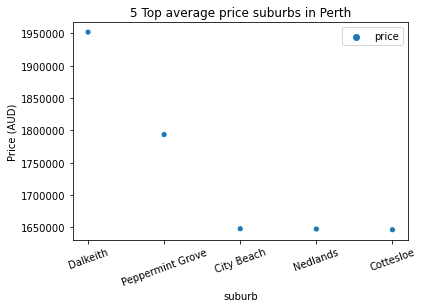

In [33]:
sns.scatterplot(data=top5)
plt.xlabel("suburb")
plt.ylabel("Price (AUD)")
plt.title("5 Top average price suburbs in Perth")
plt.xticks(rotation=20)
plt.ticklabel_format(style='plain', axis='y') #use this line to stop showing the price in scientific notation way
plt.show()

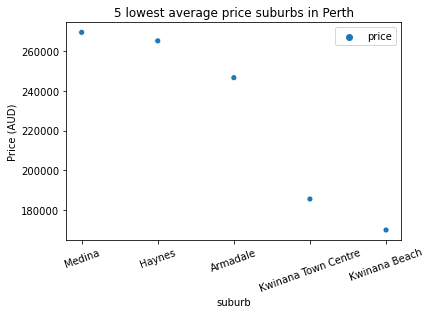

In [34]:
sns.scatterplot(data=bottom5)
plt.xlabel("suburb")
plt.ylabel("Price (AUD)")
plt.title("5 lowest average price suburbs in Perth")
plt.xticks(rotation=20)
plt.show()

# I'd like to know which suburbs' average prices are within my budget of 840k to 870k

In [35]:
mediumprice_by_suburb_sorted[(mediumprice_by_suburb_sorted.price > 840000) & (mediumprice_by_suburb_sorted.price < 870000)]

,price
suburb,
Gwelup,864035.326087
Gooseberry Hill,863590.579710
Leederville,859113.636364
Darling Downs,854428.571429
Fremantle,852178.082192
North Perth,849586.666667
Alfred Cove,840086.566667


# I'd like to see how many houses been sold in these suburbs, and just some general stats to help me know these subursb more

In [36]:
df_all_perth_clean.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold
0,85 Fenchurch Street,Alexander Heights,445000,4.0,2.0,2.0,578,164.0,1998.0,14400.0,Greenwood Station,8300.0,2020-10-01
1,25 Goldsworthy Entrance,Alexander Heights,458000,4.0,2.0,2.0,567,145.0,2000.0,14400.0,Greenwood Station,7200.0,2020-10-01
2,4 Iris Lane,Alexander Heights,490000,4.0,2.0,2.0,502,156.0,1999.0,14600.0,Greenwood Station,7800.0,2020-12-01
3,27 Avila Way,Alexander Heights,360000,3.0,1.0,2.0,685,87.0,1988.0,13400.0,Warwick Station,6900.0,2020-12-01
4,34 Lancer Way,Alexander Heights,455000,4.0,2.0,3.0,513,128.0,1993.0,13400.0,Warwick Station,6100.0,2020-12-01


In [37]:
budget_suburb_mask = df_all_perth_clean.loc[(df_all_perth_clean['suburb'] == 'Gwelup') | (df_all_perth_clean['suburb'] == 'Gooseberry Hill') | (df_all_perth_clean['suburb'] == 'Leederville') | (df_all_perth_clean['suburb'] == 'Darling Downs') | (df_all_perth_clean['suburb'] == 'Fremantle') | (df_all_perth_clean['suburb'] == 'North Perth') | (df_all_perth_clean['suburb'] == 'Alfred Cove') ]

In [38]:
budget_suburb_mask.head() #creating a dataframe with those 7 suburbs where the average house prices are within my budget

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold
128,44A Davy Street,Alfred Cove,735000,4.0,2.0,2.0,426,218.0,1999.0,9800.0,Bull Creek Station,3400.0,2020-09-01
129,36A Norma Road,Alfred Cove,680000,3.0,2.0,2.0,304,158.0,2000.0,9800.0,Bull Creek Station,3300.0,2020-10-01
130,18a Latham Street,Alfred Cove,790000,4.0,2.0,2.0,545,175.0,1999.0,10200.0,Bull Creek Station,4200.0,2020-11-01
131,557 Canning Highway,Alfred Cove,900000,3.0,1.0,0.0,545,143.0,1970.0,9900.0,Bull Creek Station,4300.0,2020-11-01
132,90 Kitchener Road,Alfred Cove,580000,3.0,2.0,0.0,348,114.0,1999.0,10500.0,Bull Creek Station,4300.0,2020-07-01


In [39]:
type(budget_suburb_mask)

pandas.core.frame.DataFrame

### Below table helped me to see how many houses were sold in the dataset for each 7 suburbs

Text(0, 0.5, 'Houses been sold')

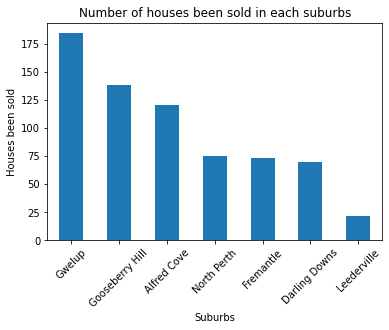

In [40]:
budget_suburb_mask['suburb'].value_counts().plot(kind='bar', rot=45, title="Number of houses been sold in each suburbs")
plt.xlabel("Suburbs")
plt.ylabel("Houses been sold")

### Gwelup has sold the most houses, just want to see the average land size stats for this suburb. 

In [41]:
df_all_perth_clean.loc[df_all_perth_clean['suburb'] == 'Gwelup','land_area'].describe()

count     184.000000
mean      539.934783
std       153.725773
min        61.000000
25%       465.750000
50%       529.000000
75%       628.500000
max      1253.000000
Name: land_area, dtype: float64

In [42]:
budget_suburb_mask.shape

(682, 13)

### below using catplot visualisation to showcase the general stats of those 7 suburbs

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Max house price')

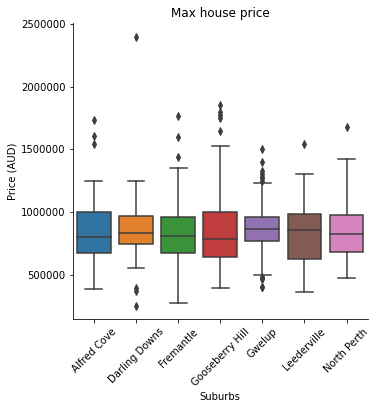

In [44]:
sns.catplot(x='suburb', 
            y='price', 
            data=budget_suburb_mask, 
            kind='box'
           )
plt.xticks(rotation=45)
plt.xlabel("Suburbs")
plt.ylabel("Price (AUD)")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Max house price")

### Then I'd like to find out the relationship between landsize & price for these suburbs

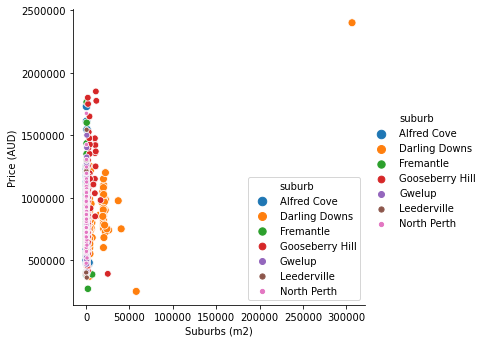

In [45]:
sns.relplot(x='land_area', 
            y='price', 
            data=budget_suburb_mask, 
            kind='scatter',
            hue='suburb',
            size='suburb',
           legend="full")
plt.legend()
plt.ylabel("Price (AUD)")
plt.xlabel("Suburbs (m2)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Here I noticed there is problem with land area in darling downs, we need further investigate the landsize in that suburb and fix the dataset.

In [46]:
budget_suburb_mask.loc[budget_suburb_mask['suburb'] == 'Darling Downs','land_area'].describe()

count        70.000000
mean      18355.142857
std       36483.423806
min         410.000000
25%        4284.250000
50%       19324.000000
75%       20206.500000
max      306500.000000
Name: land_area, dtype: float64

### Max land size is 306500m2, it is possible, however I now need put a bracket on the landsize I am looking to buy. which is under 1000 squaremeters

In [47]:
final_budget_suburb_mask = budget_suburb_mask.loc[(budget_suburb_mask['land_area'] <= 1000)]
final_budget_suburb_mask                                                

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold
128,44A Davy Street,Alfred Cove,735000,4.0,2.0,2.0,426,218.0,1999.0,9800.0,Bull Creek Station,3400.0,2020-09-01
129,36A Norma Road,Alfred Cove,680000,3.0,2.0,2.0,304,158.0,2000.0,9800.0,Bull Creek Station,3300.0,2020-10-01
130,18a Latham Street,Alfred Cove,790000,4.0,2.0,2.0,545,175.0,1999.0,10200.0,Bull Creek Station,4200.0,2020-11-01
131,557 Canning Highway,Alfred Cove,900000,3.0,1.0,0.0,545,143.0,1970.0,9900.0,Bull Creek Station,4300.0,2020-11-01
132,90 Kitchener Road,Alfred Cove,580000,3.0,2.0,0.0,348,114.0,1999.0,10500.0,Bull Creek Station,4300.0,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24613,18 Blake Street,North Perth,865000,4.0,3.0,2.0,356,160.0,1935.0,3300.0,Leederville Station,2400.0,2018-06-01
24614,5/14 Little Walcott Street,North Perth,620000,2.0,2.0,2.0,981,128.0,2004.0,3000.0,Perth Station,2900.0,2018-07-01
24615,25 Clieveden Street,North Perth,810000,3.0,1.0,2.0,332,128.0,1945.0,3500.0,Leederville Station,2400.0,2018-06-01
24616,319 Fitzgerald Street,North Perth,828000,5.0,2.0,3.0,485,221.0,1910.0,1800.0,Perth Station,1700.0,2018-06-01


### Now I can plot again to see the relationship between landsize & price

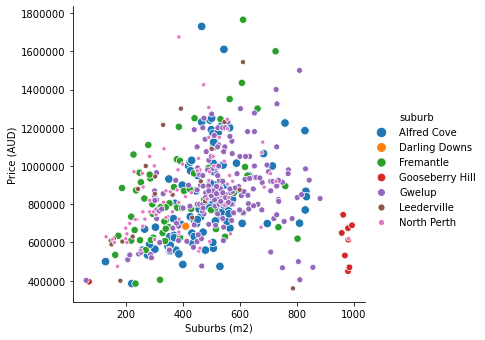

In [48]:
sns.relplot(x='land_area', 
            y='price', 
            data=final_budget_suburb_mask, 
            kind='scatter',
            hue='suburb',
            size='suburb')
plt.ylabel("Price (AUD)")
plt.xlabel("Suburbs (m2)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Now I'd like to filter out any suburbs further than 15km away from the CBD

In [49]:
Suburb_Distance = final_budget_suburb_mask.pivot_table(
    index='suburb',
    values=['CBD_dist'],
    aggfunc='mean'
)

Suburb_Distance

,CBD_dist
suburb,
Alfred Cove,9760.949505
Darling Downs,30300.000000
Fremantle,14677.941176
Gooseberry Hill,18133.333333
Gwelup,10910.382514
Leederville,2947.619048
North Perth,2820.547945


### Now I'd like to cross out the 'Darling Downs' & 'Goodberry Hill' as they are too far from CBD

In [50]:
final_budget_suburb_mask_2 = final_budget_suburb_mask[(final_budget_suburb_mask['suburb'] != 'Darling Downs') & (final_budget_suburb_mask['suburb'] != 'Gooseberry Hill')]
final_budget_suburb_mask_2['suburb'].unique()                                                 

array(['Alfred Cove', 'Fremantle', 'Gwelup', 'Leederville', 'North Perth'],
      dtype=object)

now confirmed we deleted two suburbs we don't need.

In [51]:
final_budget_suburb_mask_2.describe()                                              

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn_dist
count,4.460000e+02,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,8.567139e+05,3.461883,1.849776,1.921525,476.197309,188.668161,1815.809417,9525.461659,2433.449552
std,2.240619e+05,0.816752,0.593854,0.985574,159.132865,68.861086,555.577713,3861.051841,950.613957
min,3.600000e+05,1.000000,1.000000,0.000000,61.000000,53.000000,0.000000,1800.000000,378.000000
25%,7.100000e+05,3.000000,1.000000,2.000000,357.750000,137.000000,1951.000000,9600.000000,1800.000000
50%,8.450000e+05,3.000000,2.000000,2.000000,491.000000,181.000000,1996.000000,10300.000000,2300.000000
75%,9.700000e+05,4.000000,2.000000,2.000000,560.750000,231.000000,2004.000000,11400.000000,3000.000000
max,1.765000e+06,7.000000,4.000000,7.000000,981.000000,497.000000,2016.000000,15900.000000,4600.000000


### From the above information from the data, I'd like to choose Gwelup as my first suburb to start with. As its average house price is in my budget, it is relatively close to the city, and it had the most number of houses on the market for sale.

In [52]:
from bokeh.plotting import figure, output_file, show
output_file('example.html')
pd.set_option('display.max_columns', None)

In [53]:
df_Gwelup = final_budget_suburb_mask[final_budget_suburb_mask['suburb'] == 'Gwelup']
df_Gwelup.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold
12712,27 Swiftlet Way,Gwelup,825000,4.0,2.0,2.0,483,195.0,2008.0,11600.0,Warwick Station,2400.0,2020-09-01
12713,81 Segrave Street,Gwelup,925000,3.0,3.0,2.0,528,247.0,2014.0,9900.0,Stirling Station,1700.0,2020-08-01
12714,5 Aachen Crescent,Gwelup,606000,3.0,2.0,2.0,414,120.0,1994.0,11400.0,Warwick Station,2000.0,2020-10-01
12715,18 Swiftlet Way,Gwelup,914000,4.0,2.0,2.0,678,238.0,2003.0,11500.0,Warwick Station,2400.0,2020-08-01
12716,7 The Rise,Gwelup,940000,5.0,2.0,2.0,650,235.0,2010.0,11200.0,Warwick Station,2300.0,2020-08-01


In [54]:
from bokeh.models import CategoricalColorMapper

In [55]:
p1 = figure(plot_width=600,
            title="Relationship between price & landsize",
            x_axis_label='Price (AUD)',
            y_axis_label='Landsize (m2)')
mapper = CategoricalColorMapper(
    factors=['Warwick Station', 'Stirling Station'],
    palette=['#41b6c4', 'rosybrown',])
p1.circle('price', 'land_area',
          size=4, source = df_Gwelup,
          color={'field':'nearest_stn',
                 'transform': mapper},
          legend_field='nearest_stn'
          )
show(p1)

### Now i want to transform my data on to map, which would be much easier to have an overview of my preferred suburb property market.

### First of all I need create a data list and add my first prefered Gwelup data in. However before doing so I'd like to save a clean Gwelup csv first.

In [56]:
gwelup_ready = df_Gwelup.reset_index(drop=True).copy()
gwelup_ready

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold
0,27 Swiftlet Way,Gwelup,825000,4.0,2.0,2.0,483,195.0,2008.0,11600.0,Warwick Station,2400.0,2020-09-01
1,81 Segrave Street,Gwelup,925000,3.0,3.0,2.0,528,247.0,2014.0,9900.0,Stirling Station,1700.0,2020-08-01
2,5 Aachen Crescent,Gwelup,606000,3.0,2.0,2.0,414,120.0,1994.0,11400.0,Warwick Station,2000.0,2020-10-01
3,18 Swiftlet Way,Gwelup,914000,4.0,2.0,2.0,678,238.0,2003.0,11500.0,Warwick Station,2400.0,2020-08-01
4,7 The Rise,Gwelup,940000,5.0,2.0,2.0,650,235.0,2010.0,11200.0,Warwick Station,2300.0,2020-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,16 Jodrell Road,Gwelup,860000,4.0,2.0,2.0,540,205.0,1999.0,11100.0,Warwick Station,2500.0,2015-08-01
179,7 Careniup Avenue,Gwelup,970000,4.0,2.0,2.0,700,295.0,2000.0,11900.0,Warwick Station,1700.0,2015-08-01
180,7 Sarus Rise,Gwelup,1100000,4.0,2.0,2.0,522,286.0,2006.0,11200.0,Warwick Station,2300.0,2015-06-01
181,14 Grassbird Parade,Gwelup,1200000,4.0,2.0,2.0,550,297.0,2009.0,11500.0,Warwick Station,2300.0,2015-06-01


In [57]:
gwelup_ready.to_csv('gwelup_ready.csv', index=False) 

In [58]:
gwelup_ready['full_address'] = gwelup_ready['address'] + ', ' + gwelup_ready['suburb'] + ', WA'
gwelup_ready

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold,full_address
0,27 Swiftlet Way,Gwelup,825000,4.0,2.0,2.0,483,195.0,2008.0,11600.0,Warwick Station,2400.0,2020-09-01,"27 Swiftlet Way, Gwelup, WA"
1,81 Segrave Street,Gwelup,925000,3.0,3.0,2.0,528,247.0,2014.0,9900.0,Stirling Station,1700.0,2020-08-01,"81 Segrave Street, Gwelup, WA"
2,5 Aachen Crescent,Gwelup,606000,3.0,2.0,2.0,414,120.0,1994.0,11400.0,Warwick Station,2000.0,2020-10-01,"5 Aachen Crescent, Gwelup, WA"
3,18 Swiftlet Way,Gwelup,914000,4.0,2.0,2.0,678,238.0,2003.0,11500.0,Warwick Station,2400.0,2020-08-01,"18 Swiftlet Way, Gwelup, WA"
4,7 The Rise,Gwelup,940000,5.0,2.0,2.0,650,235.0,2010.0,11200.0,Warwick Station,2300.0,2020-08-01,"7 The Rise, Gwelup, WA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,16 Jodrell Road,Gwelup,860000,4.0,2.0,2.0,540,205.0,1999.0,11100.0,Warwick Station,2500.0,2015-08-01,"16 Jodrell Road, Gwelup, WA"
179,7 Careniup Avenue,Gwelup,970000,4.0,2.0,2.0,700,295.0,2000.0,11900.0,Warwick Station,1700.0,2015-08-01,"7 Careniup Avenue, Gwelup, WA"
180,7 Sarus Rise,Gwelup,1100000,4.0,2.0,2.0,522,286.0,2006.0,11200.0,Warwick Station,2300.0,2015-06-01,"7 Sarus Rise, Gwelup, WA"
181,14 Grassbird Parade,Gwelup,1200000,4.0,2.0,2.0,550,297.0,2009.0,11500.0,Warwick Station,2300.0,2015-06-01,"14 Grassbird Parade, Gwelup, WA"


In [59]:
pip install geopy

In [60]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="example app")

In [61]:
geolocator.geocode("Chengdu, China").raw #just a test of my home town to see if it is working

{'place_id': 258321260,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 2110264,
 'boundingbox': ['30.0920455', '31.4370968', '102.9902707', '104.8948475'],
 'lat': '30.6598628',
 'lon': '104.0633717',
 'display_name': '成都市, 四川省, 中国',
 'class': 'boundary',
 'type': 'administrative',
 'importance': 0.5265890596802565,
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png'}

In [62]:
gwelup_ready['location'] = gwelup_ready['full_address'].apply(geolocator.geocode)
gwelup_ready.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold,full_address,location
0,27 Swiftlet Way,Gwelup,825000,4.0,2.0,2.0,483,195.0,2008.0,11600.0,Warwick Station,2400.0,2020-09-01,"27 Swiftlet Way, Gwelup, WA","(Swiftlet Way, Gwelup, City Of Stirling, Weste..."
1,81 Segrave Street,Gwelup,925000,3.0,3.0,2.0,528,247.0,2014.0,9900.0,Stirling Station,1700.0,2020-08-01,"81 Segrave Street, Gwelup, WA","(Segrave Street, Gwelup, City Of Stirling, Wes..."
2,5 Aachen Crescent,Gwelup,606000,3.0,2.0,2.0,414,120.0,1994.0,11400.0,Warwick Station,2000.0,2020-10-01,"5 Aachen Crescent, Gwelup, WA","(Aachen Crescent, Gwelup, City Of Stirling, We..."
3,18 Swiftlet Way,Gwelup,914000,4.0,2.0,2.0,678,238.0,2003.0,11500.0,Warwick Station,2400.0,2020-08-01,"18 Swiftlet Way, Gwelup, WA","(Swiftlet Way, Gwelup, City Of Stirling, Weste..."
4,7 The Rise,Gwelup,940000,5.0,2.0,2.0,650,235.0,2010.0,11200.0,Warwick Station,2300.0,2020-08-01,"7 The Rise, Gwelup, WA","(The Rise, Gwelup, City Of Stirling, Western A..."


In [63]:
gwelup_ready['point']= gwelup_ready['location'].apply(lambda loc: tuple(loc.point) if loc else None)
gwelup_ready.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold,full_address,location,point
0,27 Swiftlet Way,Gwelup,825000,4.0,2.0,2.0,483,195.0,2008.0,11600.0,Warwick Station,2400.0,2020-09-01,"27 Swiftlet Way, Gwelup, WA","(Swiftlet Way, Gwelup, City Of Stirling, Weste...","(-31.8660074, 115.7916731, 0.0)"
1,81 Segrave Street,Gwelup,925000,3.0,3.0,2.0,528,247.0,2014.0,9900.0,Stirling Station,1700.0,2020-08-01,"81 Segrave Street, Gwelup, WA","(Segrave Street, Gwelup, City Of Stirling, Wes...","(-31.8813918, 115.7886588, 0.0)"
2,5 Aachen Crescent,Gwelup,606000,3.0,2.0,2.0,414,120.0,1994.0,11400.0,Warwick Station,2000.0,2020-10-01,"5 Aachen Crescent, Gwelup, WA","(Aachen Crescent, Gwelup, City Of Stirling, We...","(-31.8627179, 115.8004691, 0.0)"
3,18 Swiftlet Way,Gwelup,914000,4.0,2.0,2.0,678,238.0,2003.0,11500.0,Warwick Station,2400.0,2020-08-01,"18 Swiftlet Way, Gwelup, WA","(Swiftlet Way, Gwelup, City Of Stirling, Weste...","(-31.8660074, 115.7916731, 0.0)"
4,7 The Rise,Gwelup,940000,5.0,2.0,2.0,650,235.0,2010.0,11200.0,Warwick Station,2300.0,2020-08-01,"7 The Rise, Gwelup, WA","(The Rise, Gwelup, City Of Stirling, Western A...","(-31.8645999, 115.8003355, 0.0)"


In [64]:
gwelup_ready[['lat', 'lon', 'altitude']] = pd.DataFrame(gwelup_ready['point'].to_list(), index=gwelup_ready.index)
gwelup_ready.head()

,address,suburb,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,CBD_dist,nearest_stn,nearest_stn_dist,date_sold,full_address,location,point,lat,lon,altitude
0,27 Swiftlet Way,Gwelup,825000,4.0,2.0,2.0,483,195.0,2008.0,11600.0,Warwick Station,2400.0,2020-09-01,"27 Swiftlet Way, Gwelup, WA","(Swiftlet Way, Gwelup, City Of Stirling, Weste...","(-31.8660074, 115.7916731, 0.0)",-31.866007,115.791673,0.0
1,81 Segrave Street,Gwelup,925000,3.0,3.0,2.0,528,247.0,2014.0,9900.0,Stirling Station,1700.0,2020-08-01,"81 Segrave Street, Gwelup, WA","(Segrave Street, Gwelup, City Of Stirling, Wes...","(-31.8813918, 115.7886588, 0.0)",-31.881392,115.788659,0.0
2,5 Aachen Crescent,Gwelup,606000,3.0,2.0,2.0,414,120.0,1994.0,11400.0,Warwick Station,2000.0,2020-10-01,"5 Aachen Crescent, Gwelup, WA","(Aachen Crescent, Gwelup, City Of Stirling, We...","(-31.8627179, 115.8004691, 0.0)",-31.862718,115.800469,0.0
3,18 Swiftlet Way,Gwelup,914000,4.0,2.0,2.0,678,238.0,2003.0,11500.0,Warwick Station,2400.0,2020-08-01,"18 Swiftlet Way, Gwelup, WA","(Swiftlet Way, Gwelup, City Of Stirling, Weste...","(-31.8660074, 115.7916731, 0.0)",-31.866007,115.791673,0.0
4,7 The Rise,Gwelup,940000,5.0,2.0,2.0,650,235.0,2010.0,11200.0,Warwick Station,2300.0,2020-08-01,"7 The Rise, Gwelup, WA","(The Rise, Gwelup, City Of Stirling, Western A...","(-31.8645999, 115.8003355, 0.0)",-31.864600,115.800336,0.0


In [65]:
# For some reason jupiter book cannot import folium straight away, I had to intall first.

In [66]:
!pip install folium

In [67]:
import folium

In [68]:
#Firstly use my hometown to try to see if map works

In [69]:
map_test = folium.Map(
    location=[30.6598628,104.0633717],
    tiles='cartodbpositron',
    zoom_start=12,
)
map_test

In [70]:
# Success! very cool!!

In [71]:
map_gwelup = folium.Map(
    location=[-31.866007,115.791673],
    tiles='cartodbpositron',
    zoom_start=14,
)
gwelup_ready.apply(lambda row:folium.CircleMarker(location=[row['lat'], row['lon']]).add_to(map_gwelup), axis=1)
map_gwelup

### I'd like to further improve my map by adding in more info with popup windows.

In [72]:
map_gwelup_advanced = folium.Map(
    location=[-31.866007,115.791673],
    tiles='cartodbpositron',
    zoom_start=14,
)
gwelup_ready.apply(lambda row:folium.Marker(location=[row['lat'], row['lon']],popup = f"Price(AUD):${row['price']} \n Landsize:{row['land_area']}m2").add_to(map_gwelup_advanced), axis=1)
map_gwelup_advanced